In [4]:
# Import Modules
import pandas as pd
import numpy as np
import sqlite3
import pickle
import os
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
# Import Dataset
conn = sqlite3.connect('/data1/StackOverflow/stackexchange-to-sqlite/stack.db')
query = '''
SELECT id, creation_date, owner_user_id, tags
FROM questions
WHERE creation_date > '2021-09-01'
AND creation_date < '2023-09-01';
'''
df = pd.read_sql_query(query, conn)
conn.close()

In [5]:
# Import Users Data
conn = sqlite3.connect('/data1/StackOverflow/stackexchange-to-sqlite/stack.db')
query = '''
SELECT id, creation_date
FROM users;
'''
user_df = pd.read_sql_query(query, conn)
conn.close()

In [6]:
user_df = user_df.rename(columns = {'creation_date':'account_creation_date',
                                    'id': 'owner_user_id'})
df = df.dropna(subset=['owner_user_id'])
df['owner_user_id'] = df['owner_user_id'].astype(int).astype(str)
user_df['owner_user_id'] = user_df.owner_user_id.astype(str)
df_merge = pd.merge(df, user_df, on = 'owner_user_id', how = 'left')
df_merge

,id,creation_date,owner_user_id,tags,account_creation_date
0,69006423,2021-09-01 00:00:35.237,14087917,"[""node.js"", ""reactjs"", ""express"", ""axios"", ""re...",2020-08-11 15:14:12.437
1,69006426,2021-09-01 00:00:55.583,13091928,"[""r"", ""shiny""]",2020-03-20 01:17:22.550
2,69006431,2021-09-01 00:01:23.670,8110267,"[""java"", ""installation"", ""compilation"", ""proje...",2017-06-04 12:15:02.013
3,69006437,2021-09-01 00:03:18.750,2745485,"[""firebase"", ""nuxt.js"", ""firebase-hosting""]",2013-09-04 06:00:02.613
4,69006439,2021-09-01 00:03:36.930,12139975,"[""r"", ""data.table""]",2019-09-29 20:57:59.120
...,...,...,...,...,...
2682915,77019848,2023-08-31 23:54:30.057,1006272,"[""docker"", ""docker-compose"", ""owasp-dependency...",2011-10-21 00:44:45.587
2682916,77019849,2023-08-31 23:55:21.660,15216800,"[""microsoft-graph-api"", ""sharepoint-online""]",2021-02-15 22:29:56.837
2682917,77019852,2023-08-31 23:56:42.653,433202,"[""python"", ""numpy"", ""floating-point""]",2010-08-27 17:36:47.873
2682918,77019854,2023-08-31 23:57:28.633,2532775,"[""angular"", ""typescript"", ""progressive-web-app...",2013-06-28 17:18:15.807


### Compute Difference between post creation date and user creation date

In [7]:
# Compute difference between post creation_date - user creation_date.
df_merge['month_diff'] = (pd.to_datetime(df_merge['creation_date']) - pd.to_datetime(df_merge['account_creation_date'])) / pd.Timedelta(days=30)

In [10]:
# There are some negative values in the raw data.
df_merge[df_merge['month_diff'] <= 0]

,id,creation_date,owner_user_id,tags,account_creation_date,month_diff
5900,69026674,2021-09-02 08:25:33.403,17450994,"[""amazon-web-services"", ""kubernetes"", ""prometh...",2021-11-18 20:12:17.750,-2.583026
57314,69197834,2021-09-15 17:55:30.727,17450994,"[""jenkins"", ""teamcity""]",2021-11-18 20:12:17.750,-2.136500
137933,69464705,2021-09-11 10:08:01.420,17142767,"[""html"", ""http"", ""post"", ""xss""]",2021-10-13 12:38:18.520,-1.070145
138640,69467111,2021-10-06 13:40:32.650,17090949,"[""sql"", ""sql-server""]",2021-10-06 15:47:08.750,-0.002931
174934,69587843,2021-10-15 15:31:26.067,17165773,"[""keras"", ""r""]",2021-10-16 05:34:53.577,-0.019525
...,...,...,...,...,...,...
2635869,76912946,2023-08-16 01:59:48.140,22407721,"[""conditional-statements"", ""emacs"", ""arguments""]",2023-08-17 23:13:27.293,-0.062816
2637560,76916944,2023-08-16 19:49:14.903,22401730,"[""avr"", ""avr-gcc""]",2023-08-16 21:27:23.667,-0.002272
2640202,76923267,2023-07-17 05:13:05.937,22250711,"[""python"", ""python-requests"", ""append"", ""fasta""]",2023-07-19 07:14:01.470,-0.069466
2663195,76977497,2023-08-25 12:52:38.617,22446908,"[""python"", ""cryptography"", ""bitcoin"", ""public-...",2023-08-25 13:22:31.713,-0.000692


In [11]:
df_cleaned = df_merge[df_merge['month_diff'] >= 0]
df_cleaned

,id,creation_date,owner_user_id,tags,account_creation_date,month_diff
0,69006423,2021-09-01 00:00:35.237,14087917,"[""node.js"", ""reactjs"", ""express"", ""axios"", ""re...",2020-08-11 15:14:12.437,12.845518
1,69006426,2021-09-01 00:00:55.583,13091928,"[""r"", ""shiny""]",2020-03-20 01:17:22.550,17.664897
2,69006431,2021-09-01 00:01:23.670,8110267,"[""java"", ""installation"", ""compilation"", ""proje...",2017-06-04 12:15:02.013,51.649684
3,69006437,2021-09-01 00:03:18.750,2745485,"[""firebase"", ""nuxt.js"", ""firebase-hosting""]",2013-09-04 06:00:02.613,97.291742
4,69006439,2021-09-01 00:03:36.930,12139975,"[""r"", ""data.table""]",2019-09-29 20:57:59.120,23.404297
...,...,...,...,...,...,...
2682915,77019848,2023-08-31 23:54:30.057,1006272,"[""docker"", ""docker-compose"", ""owasp-dependency...",2011-10-21 00:44:45.587,144.432170
2682916,77019849,2023-08-31 23:55:21.660,15216800,"[""microsoft-graph-api"", ""sharepoint-online""]",2021-02-15 22:29:56.837,30.901977
2682917,77019852,2023-08-31 23:56:42.653,433202,"[""python"", ""numpy"", ""floating-point""]",2010-08-27 17:36:47.873,158.408794
2682918,77019854,2023-08-31 23:57:28.633,2532775,"[""angular"", ""typescript"", ""progressive-web-app...",2013-06-28 17:18:15.807,123.875908


In [12]:
df_cleaned.describe()

,id,month_diff
count,2.682779e+06,2.682779e+06
mean,7.323563e+07,4.215451e+01
std,2.333628e+06,4.527061e+01
min,6.900642e+07,7.831790e-08
25%,7.121446e+07,2.514707e+00
50%,7.340835e+07,2.419471e+01
75%,7.526984e+07,7.319011e+01
max,7.701986e+07,1.834103e+02


In [15]:
# Descriptive Statistics for each month
df_cleaned['year_month'] = pd.to_datetime(df_cleaned['creation_date']).dt.to_period('M') # Monthly
stats = df_cleaned.groupby("year_month").agg({"month_diff": ["mean", "std", "min",lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75), "max"]}).reset_index()
# Extracting the median (quantile 0.5) values for visualization
stats.columns = ['year_month', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
stats

/tmp/ipykernel_1325242/4255485317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year_month'] = pd.to_datetime(df_cleaned['creation_date']).dt.to_period('M') # Monthly


,year_month,mean,std,min,25%,50%,75%,max
0,2021-09,39.084752,41.582327,2.816358e-07,2.870832,22.475281,67.293687,160.069253
1,2021-10,39.450635,42.056076,7.831790e-08,2.702128,22.464439,68.408309,161.012606
2,2021-11,39.078805,42.065570,1.225694e-05,2.404149,21.736307,67.569235,162.060801
3,2021-12,39.007455,42.136949,1.599807e-05,2.385813,21.581035,67.336220,162.815341
4,2022-01,40.257924,42.768726,5.154321e-07,2.922533,22.791700,69.778432,164.149880
5,2022-02,40.441733,43.129202,9.979552e-06,2.793419,23.037440,70.378550,165.035159
6,2022-03,40.046281,43.071632,9.274691e-06,2.558614,22.983667,69.405820,166.318841
7,2022-04,39.096956,43.060091,2.895062e-06,2.082557,21.665821,67.038536,167.128731
8,2022-05,39.553294,43.443208,5.054012e-07,2.134571,21.805822,67.727068,168.213863
9,2022-06,40.157973,43.749836,3.499228e-07,2.267786,22.599956,69.342544,169.288366


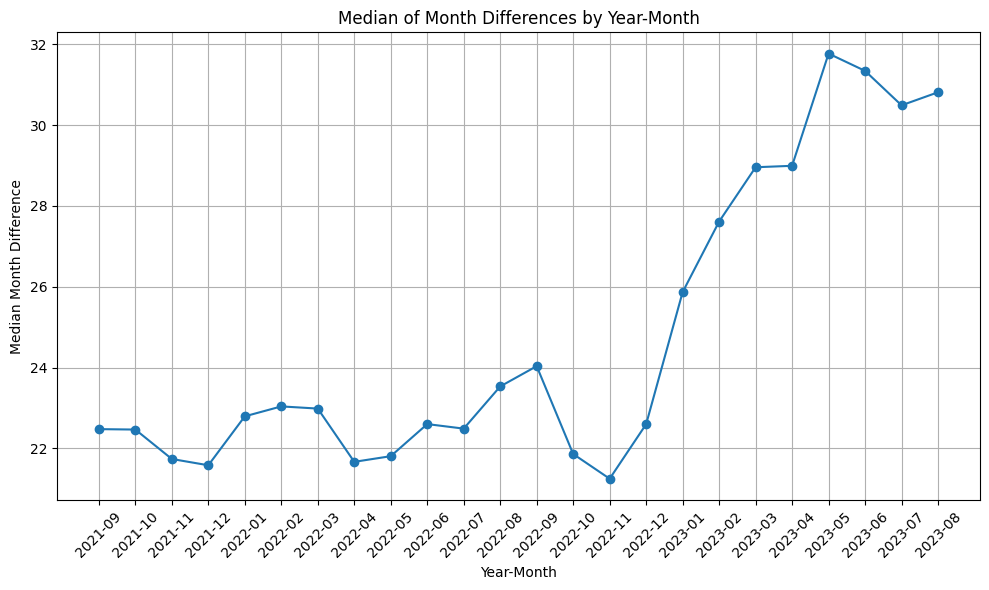

In [16]:
# Visualization of median value by each month.
plt.figure(figsize=(10, 6))
plt.plot(stats['year_month'].astype(str), stats['50%'], marker='o', linestyle='-')
plt.title('Median of Month Differences by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Median Month Difference')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

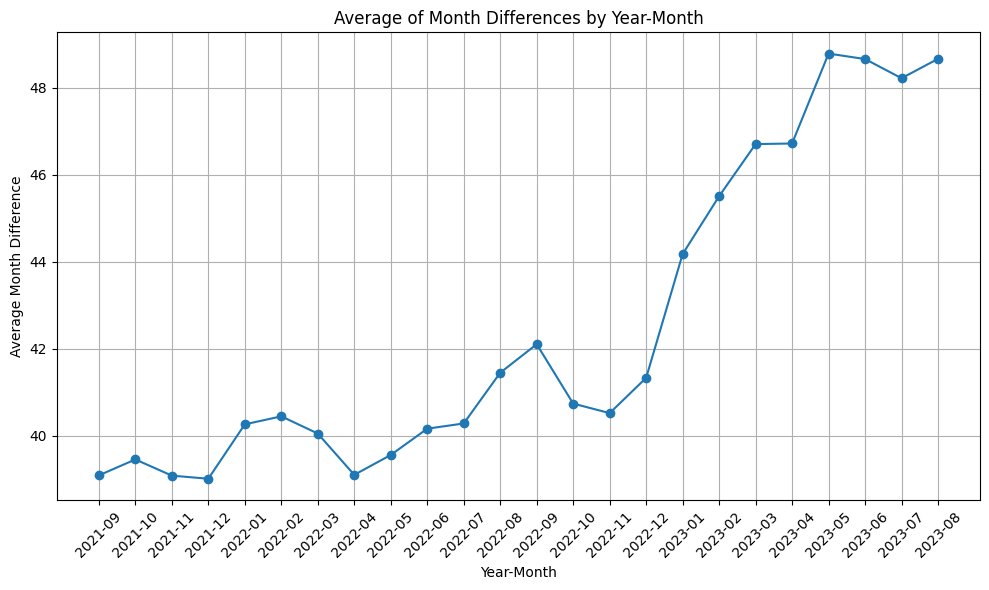

In [17]:
# Visualization of median value by each month.
plt.figure(figsize=(10, 6))
plt.plot(stats['year_month'].astype(str), stats['mean'], marker='o', linestyle='-')
plt.title('Average of Month Differences by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Average Month Difference')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

### Define isNew Variable

In [18]:
# set threshold as 12 months. (1 year)
df_cleaned['isNew'] = df_cleaned['month_diff'].apply(lambda x: 1 if x <= 12 else 0)
df_cleaned

/tmp/ipykernel_1325242/1142720860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['isNew'] = df_cleaned['month_diff'].apply(lambda x: 1 if x <= 12 else 0)


,id,creation_date,owner_user_id,tags,account_creation_date,month_diff,year_month,isNew
0,69006423,2021-09-01 00:00:35.237,14087917,"[""node.js"", ""reactjs"", ""express"", ""axios"", ""re...",2020-08-11 15:14:12.437,12.845518,2021-09,0
1,69006426,2021-09-01 00:00:55.583,13091928,"[""r"", ""shiny""]",2020-03-20 01:17:22.550,17.664897,2021-09,0
2,69006431,2021-09-01 00:01:23.670,8110267,"[""java"", ""installation"", ""compilation"", ""proje...",2017-06-04 12:15:02.013,51.649684,2021-09,0
3,69006437,2021-09-01 00:03:18.750,2745485,"[""firebase"", ""nuxt.js"", ""firebase-hosting""]",2013-09-04 06:00:02.613,97.291742,2021-09,0
4,69006439,2021-09-01 00:03:36.930,12139975,"[""r"", ""data.table""]",2019-09-29 20:57:59.120,23.404297,2021-09,0
...,...,...,...,...,...,...,...,...
2682915,77019848,2023-08-31 23:54:30.057,1006272,"[""docker"", ""docker-compose"", ""owasp-dependency...",2011-10-21 00:44:45.587,144.432170,2023-08,0
2682916,77019849,2023-08-31 23:55:21.660,15216800,"[""microsoft-graph-api"", ""sharepoint-online""]",2021-02-15 22:29:56.837,30.901977,2023-08,0
2682917,77019852,2023-08-31 23:56:42.653,433202,"[""python"", ""numpy"", ""floating-point""]",2010-08-27 17:36:47.873,158.408794,2023-08,0
2682918,77019854,2023-08-31 23:57:28.633,2532775,"[""angular"", ""typescript"", ""progressive-web-app...",2013-06-28 17:18:15.807,123.875908,2023-08,0


In [20]:
df_cleaned.to_csv("df_isNew", index = False)